In [1]:
from weight_shared_analyzer import WeightSharedRun, plot_pareto_curves_ws, get_pareto_curves_df
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
smallest_subnet = {"d":[0,0,0,0], "e": 0.1}
middle_1_subnet = {"d":[0,1,0,1], "e": 0.14}
middle_2_subnet = {"d":[1,1,1,1], "e": 0.18}
largest_subnet = {"d":[2,2,2,2], "e": 0.25}
pareto_front_repr = [smallest_subnet, middle_1_subnet, middle_2_subnet, largest_subnet]
pareto_mapping = {f"{smallest_subnet}": "smallest",  f"{middle_1_subnet}": "middle-1", f"{middle_2_subnet}": "middle-2", f"{largest_subnet}" : "largest"}
subnet_ordering = ["smallest", "middle-1", "middle-2", "largest"]

In [2]:
def fedavgCurves(smallest, middle1, middle2, largest):
    fedavg_smallest = WeightSharedRun(smallest, pareto_front_repr, pareto_mapping)
    fedavg_middle_1 = WeightSharedRun(middle1, pareto_front_repr, pareto_mapping)
    fedavg_middle_2 = WeightSharedRun(middle2, pareto_front_repr, pareto_mapping)
    fedavg_largest = WeightSharedRun(largest, pareto_front_repr, pareto_mapping)

    print(fedavg_smallest.name)
    print(fedavg_smallest.df["round"].max())

    print(fedavg_middle_1.name)
    print(fedavg_middle_1.df["round"].max())

    print(fedavg_middle_2.name)
    print(fedavg_middle_2.df["round"].max())

    print(fedavg_largest.name)
    print(fedavg_largest.df["round"].max())
    return [fedavg_smallest, fedavg_middle_1, fedavg_middle_2, fedavg_largest]


In [3]:
#Maxnetcos Percentage Round Ablation
fedavg_runs = fedavgCurves(["flofa/cifar10-cleaned/1dl2fxi9", "flofa/cifar10-cleaned/1wh978r3", "flofa/cifar10-cleaned/nt133vae"],
                          ["flofa/cifar10-cleaned/w2sqaon2", "flofa/cifar10-cleaned/1zpyz46a", "flofa/cifar10-cleaned/sep9wu4x"],
                          ["flofa/cifar10-cleaned/3hh2dhn3", "flofa/cifar10-cleaned/1ayzkmjw", "flofa/cifar10-cleaned/3kwfm379"],
                          ["flofa/cifar10-cleaned/1956egfp", "flofa/cifar10-cleaned/3bafwyp3", "flofa/cifar10-cleaned/ftc7rokb"])

alph=100-fedavg-smallest-subnet
1650.0
alph=100-fedavg-small-subnet
1750.0
alph=100-fedavg-middle-subnet
1499.3333333333333
alph=100-fedavg-largest-subnet
1499.0


In [7]:
maxnet = WeightSharedRun(["flofa/cifar10-cleaned/3vn2tjv1", "flofa/cifar10-cleaned/1y1tkuw3", "flofa/cifar10-cleaned/1pqzuk1l"], pareto_front_repr, pareto_mapping, name="MaxnetCos80%")
print(maxnet.name)
print(maxnet.df["round"].max())
maxnet0_5 = WeightSharedRun(["flofa/cifar10-cleaned/2yi6gdma", "flofa/cifar10-cleaned/1qq7zru3", "flofa/cifar10-cleaned/11v27nx4"], pareto_front_repr, pareto_mapping, name="MaxnetCos0.5")
maxnet50 = WeightSharedRun(["flofa/cifar10-cleaned/238zgiwi", "flofa/cifar10-cleaned/mzsfxesx", "flofa/cifar10-cleaned/6n2xd1h3"], pareto_front_repr, pareto_mapping, name="MaxnetCos50%")
maxnet100 = WeightSharedRun(["flofa/cifar10-cleaned/3re1hdm8", "flofa/cifar10-cleaned/2dhr6xmn", "flofa/cifar10-cleaned/1smenfz2"], pareto_front_repr, pareto_mapping, name="MaxnetCos100%")


MaxnetCos80%
1650.0


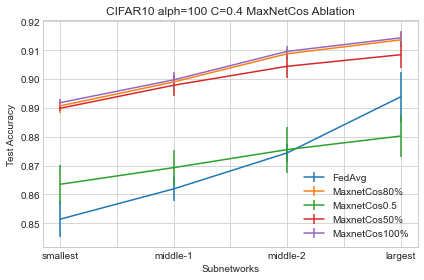

In [8]:
matplotlib.style.use("seaborn-whitegrid")
ws_runs = [maxnet, maxnet0_5, maxnet50, maxnet100]
# ws_runs = [TS]


mode="avg"
fed_pareto, error_fed_pareto = get_pareto_curves_df(fedavg_runs, "Test/{model}/Acc", uptil_round=1500, rename=True, axis=0, name="FedAvg")
ws_pareto, error_ws_pareto = get_pareto_curves_df(ws_runs,  "Test/{model}/Acc", uptil_round=1500, rename=True, mode="largest")
final_df = pd.concat([fed_pareto, ws_pareto], axis=1).loc[subnet_ordering]
final_error_df = pd.concat([error_fed_pareto, error_ws_pareto], axis=1).loc[subnet_ordering]
final_df.plot.line(title=f"# Round: 1500", yerr=final_error_df)
plt.xlabel("Subnetworks")
plt.ylabel("Test Accuracy")
plt.title("CIFAR10 alph=100 C=0.4 MaxNetCos Ablation")
plt.tight_layout()
plt.legend(loc=0)
plt.savefig("cifar10_maxnetcos_ablation.pdf")